In [1]:
from openai import OpenAI
import os
import requests
from IPython.display import Image, display
import random
import string
import math
import numpy as np
import cv2
import keras_ocr
import matplotlib.pyplot as plt

In [2]:


client = OpenAI(
    api_key=os.environ.get("OPENAI_KEY"),  # This is the default and can be omitted
)

def save_image_from_url(image_url, prompt):
    # Generate filename from prompt
    local_filename = f"saved_images/{prompt.replace(' ', '_')}.png"
    response = requests.get(image_url)
    with open(local_filename, 'wb') as f:
        f.write(response.content)
    print(f"Image saved as {local_filename}")
    return local_filename


def askGPT(systemPrompt, userPrompt):
    try:
        response = client.chat.completions.create(
            model="gpt-4o-mini",  # Use GPT-4 if available: "gpt-4"
            messages=[
                {"role": "system", "content": systemPrompt},
                {"role": "user", "content": userPrompt}
            ],
            # max_tokens=150,
            temperature=0.7  # Controls creativity
        )
        response = response.choices[0].message.content.strip()
        return response

    except Exception as e:
        print("ERROR: ", e)
        return None
    


In [3]:
def construct_image_prompt(hobby:str, topic:str, analogy:str, concept_breakdown:str):
    text = f"""
    * Instructions:
    You are teaching adults data science by relating it to their hobby. 
    Generate explanatory image for given text
    The image has to include the analogy provided and be not too crowded (minimalism is ideal).
    Focus on specific, visually representable elements and avoid typography.
    Have no more than 5 objects in the image.
    Hoby:
    {hobby}
    * Data science topic:
    {topic}
    * Analogy:
    {analogy}
    {concept_breakdown}
    * Generate this image. Remove any text.
"""
    return text

hobby = "Fishing"
topic = "Standard deviation"
analogy = "Standard deviation can be understood as variation in fish size"
concept_breakdown = "Standard deviation measures the amount of variation or dispersion of a set of values. In fishing, if the fish sizes are close to the average size, the standard deviation is low. If the fish sizes vary greatly, the standard deviation is high."


first_prompt =construct_image_prompt(hobby, topic, analogy, concept_breakdown)

print(first_prompt)


    * Instructions:
    You are teaching adults data science by relating it to their hobby. 
    Generate explanatory image for given text
    The image has to include the analogy provided and be not too crowded (minimalism is ideal).
    Focus on specific, visually representable elements and avoid typography.
    Have no more than 5 objects in the image.
    Hoby:
    Fishing
    * Data science topic:
    Standard deviation
    * Analogy:
    Standard deviation can be understood as variation in fish size
    Standard deviation measures the amount of variation or dispersion of a set of values. In fishing, if the fish sizes are close to the average size, the standard deviation is low. If the fish sizes vary greatly, the standard deviation is high.
    * Generate this image. Remove any text.



Image saved as saved_images/qqWHaFNlyHJr.png


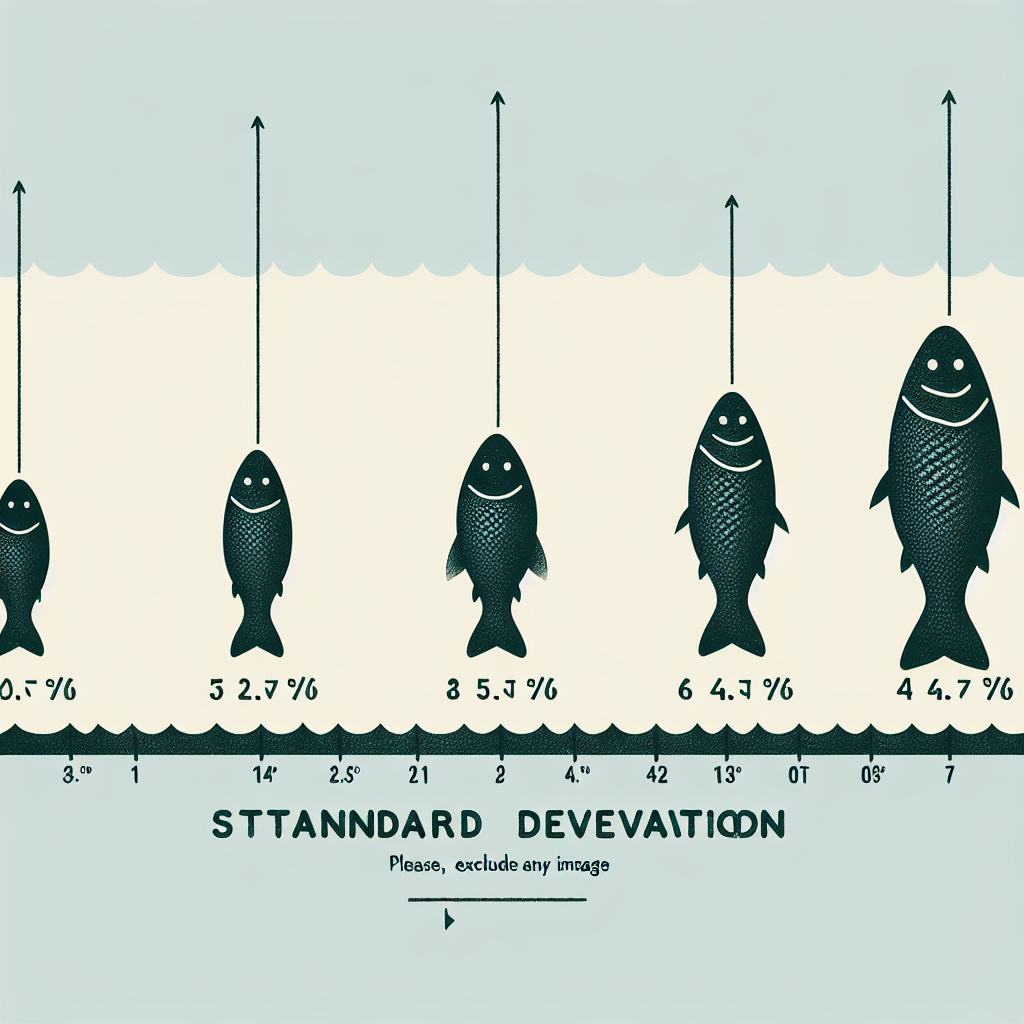

In [4]:
def generate_image(prompt, size="1024x1024"):
    response = client.images.generate(
        model="dall-e-3",
        prompt=prompt,
        size=size,
        #quality="s",
        style = 'vivid',
        n=1,
    )
    return response.data[0].url

prompt = first_prompt
image_url = generate_image(first_prompt)

def generate_random_key(length=12):
    """Generates """
    letters = string.ascii_letters
    return ''.join(random.choice(letters) for _ in range(length))

local_filename = save_image_from_url(image_url, generate_random_key())

# Display the saved image
display(Image(filename=local_filename))

pip install numpy opencv-python keras-ocr matplotlib tensorflow


In [12]:
import random
import string
import requests
import keras_ocr
import numpy as np
import cv2
import math
import matplotlib.pyplot as plt


class DalleProcessor:
    def __init__(self, client):
        self.client = OpenAI(
    api_key=os.environ.get("OPENAI_KEY"),  # This is the default and can be omitted
)
        


    def askGPT(self, systemPrompt, userPrompt):
        try:
            response = self.client.chat.completions.create(
                model="gpt-4o-mini",  # Use GPT-4 if available: "gpt-4"
                messages=[
                    {"role": "system", "content": systemPrompt},
                    {"role": "user", "content": userPrompt}
                ],
                temperature=0.7  # Controls creativity
            )
            response = response.choices[0].message.content.strip()
            return response

        except Exception as e:
            print("ERROR: ", e)
            return None

    def construct_image_prompt(self, hobby, topic, analogy, concept_breakdown):
        text = f"""
        * Instructions:
        You are teaching adults data science by relating it to their hobby. 
        Generate explanatory image for given text
        The image has to include the analogy provided and be not too crowded (minimalism is ideal).
        Focus on specific, visually representable elements and avoid typography.
        Have no more than 5 objects in the image.
        Hoby:
        {hobby}
        * Data science topic:
        {topic}
        * Analogy:
        {analogy}
        {concept_breakdown}
        * Generate this image. Remove any text.
    """
        return text

    def generate_random_filename(self, length=13):
        letters = string.ascii_letters + string.digits
        return ''.join(random.choice(letters) for _ in range(length)) + ".png"

    def save_image_from_url(self, image_url, prompt):
        # Generate filename from prompt
        local_filename = f"saved_images/{self.generate_random_filename()}"
        response = requests.get(image_url)
        with open(local_filename, 'wb') as f:
            f.write(response.content)
        print(f"Image saved as {local_filename}")
        return local_filename

    def generate_image(self, prompt, size="1024x1024"):
        response = self.client.images.generate(
            model="dall-e-3",
            prompt=prompt,
            size=size,
            style='vivid',
            n=1,
        )
        return response.data[0].url

    def generate_and_save(self, hobby, topic, analogy, concept_breakdown):
        prompt = self.construct_image_prompt(hobby, topic, analogy, concept_breakdown)
        image_url = self.generate_image(prompt)
        local_filename = self.save_image_from_url(image_url, prompt)
        return local_filename


        


class OCRProcessor:
    def __init__(self):
        self.pipeline = keras_ocr.pipeline.Pipeline()

    def midpoint(self, x1, y1, x2, y2):
        """Calculate the midpoint between two points."""
        x_mid = int((x1 + x2) / 2)
        y_mid = int((y1 + y2) / 2)
        return (x_mid, y_mid)

    def inpaint_text(self, img_path):
        """
        Remove all text from an image using OCR and inpainting.

        Parameters:
        img_path (str): Path to the input image.

        Returns:
        np.array: The inpainted image without text.
        """
        # Read image
        img = keras_ocr.tools.read(img_path)

        # Generate (word, box) tuples
        prediction_groups = self.pipeline.recognize([img])

        # Create a mask with the same dimensions as the image
        mask = np.zeros(img.shape[:2], dtype="uint8")

        for box in prediction_groups[0]:
            x0, y0 = box[1][0]
            x1, y1 = box[1][1]
            x2, y2 = box[1][2]
            x3, y3 = box[1][3]

            x_mid0, y_mid0 = self.midpoint(x1, y1, x2, y2)
            x_mid1, y_mi1 = self.midpoint(x0, y0, x3, y3)

            thickness = int(math.sqrt((x2 - x1)**2 + (y2 - y1)**2))

            # Apply line mask over detected text
            cv2.line(mask, (x_mid0, y_mid0), (x_mid1, y_mi1), 255, thickness)

        # Apply inpainting
        img = cv2.inpaint(img, mask, 7, cv2.INPAINT_NS)

        return img
    
    def save_image(self, img, path):
        """Save an image to the specified path."""
        cv2.imwrite(path, img)
        print(f"Image saved at {path}")


    def inpaint_and_save(self, img_path, save_path):
        inpainted_img = self.inpaint_text(img_path)
        self.save_image(inpainted_img, save_path)
        return save_path


hobby = "Fishing"
topic = "Standard deviation"
analogy = "Standard deviation can be understood as variation in fish size"
concept_breakdown = "Standard deviation measures the amount of variation or dispersion of a set of values. In fishing, if the fish sizes are close to the average size, the standard deviation is low. If the fish sizes vary greatly, the standard deviation is high."


ocr_processor = OCRProcessor()
image_generator = DalleProcessor(client)

saved_image_path  = image_generator.generate_and_save(hobby, topic, analogy, concept_breakdown)

ocr_processor.inpaint_and_save(saved_image_path, saved_image_path)

print(saved_image_path)



Looking for C:\Users\326po\.keras-ocr\craft_mlt_25k.h5
Looking for C:\Users\326po\.keras-ocr\crnn_kurapan.h5
Image saved as saved_images/tS0Vl3jN8PiCn.png
1/1 [==============================] - 3s 3s/step
Image saved at saved_images/tS0Vl3jN8PiCn.png
saved_images/tS0Vl3jN8PiCn.png
